In [2]:
import numpy as  np
import pandas as pd
import statsapi as mlb



# I had no idea how to use the statsapi module
# at this point, so I started by performing some tests

In [3]:
test = mlb.roster(143,'25Man',date=mlb.get('season',{'seasonId':2017,'sportId':1})['seasons'][0]['regularSeasonStartDate'])

In [5]:
print( test )

#23  RF  Aaron Altherr
#27  P   Aaron Nola
#39  P   Adam Morgan
#4   3B  Andres Blanco
#34  C   Andrew Knapp
#41  1B  Brock Stassi
#29  C   Cameron Rupp
#16  2B  Cesar Hernandez
#21  P   Clay Buchholz
#25  LF  Daniel Nava
#61  P   Edubray Ramos
#13  SS  Freddy Galvis
#50  P   Hector Neris
#47  LF  Howie Kendrick
#46  P   Jeanmar Gomez
#48  P   Jerad Eickhoff
#58  P   Jeremy Hellickson
#53  P   Joaquin Benoit
#63  P   Joely Rodriguez
#7   3B  Maikel Franco
#5   RF  Michael Saunders
#37  CF  Odubel Herrera
#17  P   Pat Neshek
#19  1B  Tommy Joseph
#28  P   Vince Velasquez



In [6]:
teams = mlb.get('teams',{'sportIds':1,'activeStatus':'Yes','fields':'teams,name'})['teams']


In [7]:
print(teams)

[{'name': 'Oakland Athletics'}, {'name': 'Pittsburgh Pirates'}, {'name': 'San Diego Padres'}, {'name': 'Seattle Mariners'}, {'name': 'San Francisco Giants'}, {'name': 'St. Louis Cardinals'}, {'name': 'Tampa Bay Rays'}, {'name': 'Texas Rangers'}, {'name': 'Toronto Blue Jays'}, {'name': 'Minnesota Twins'}, {'name': 'Philadelphia Phillies'}, {'name': 'Atlanta Braves'}, {'name': 'Chicago White Sox'}, {'name': 'Miami Marlins'}, {'name': 'New York Yankees'}, {'name': 'Milwaukee Brewers'}, {'name': 'Los Angeles Angels'}, {'name': 'Arizona Diamondbacks'}, {'name': 'Baltimore Orioles'}, {'name': 'Boston Red Sox'}, {'name': 'Chicago Cubs'}, {'name': 'Cincinnati Reds'}, {'name': 'Cleveland Indians'}, {'name': 'Colorado Rockies'}, {'name': 'Detroit Tigers'}, {'name': 'Houston Astros'}, {'name': 'Kansas City Royals'}, {'name': 'Los Angeles Dodgers'}, {'name': 'Washington Nationals'}, {'name': 'New York Mets'}]


In [8]:
print (len(teams))

30


# I needed a list of team id's, so I wrote the code below.

In [9]:
teamlist = list()
for i in range(90):
    teamdata = mlb.lookup_team(i+70)
    if len(teamdata) > 0:
        teamlist.append(teamdata)


In [10]:
print(type(teamlist[0]))
print(teamlist[0])
mylist = teamlist[0]
print('Hello')
mylist[0]['id']

<class 'list'>
[{'id': 108, 'name': 'Los Angeles Angels', 'teamCode': 'ana', 'fileCode': 'ana', 'teamName': 'Angels', 'locationName': 'Anaheim', 'shortName': 'LA Angels'}]
Hello


108

# Convert to a list.

In [11]:
team1 = list()
for item in teamlist:
    t = list()
    t.append(item[0]['id'])
    t.append(item[0]['name'])
    team1.append(t)
    
    
    
    

In [12]:
df1 = pd.DataFrame(team1)

In [5]:
df1.head()

,0,1
0,108,Los Angeles Angels
1,109,Arizona Diamondbacks
2,110,Baltimore Orioles
3,111,Boston Red Sox
4,112,Chicago Cubs


In [104]:
df1.to_csv("teams_with_codes.csv")

# Now I can get a roster for all teams.

In [6]:
year = 2018
team40manRosterStart2018= list()
for i in range(30):
    team_code = df1.iloc[i,0] 
    team_name = df1.iloc[i,1]
    roster_a = mlb.roster(team_code,'40Man',date=mlb.get('season',{'seasonId':year,'sportId':1})['seasons'][0]['regularSeasonStartDate'])
    roster_b = roster_a.split('\n')
    roster_c = list(dict.fromkeys(roster_b))        
    for item in roster_c:
        player=list()
        player.append(team_code)
        player.append(team_name)
        roster_d = item.split(' ')
        for word in roster_d:
            if not word == '':
                player.append(word)        
        team40manRosterStart2018.append( player )                
                    
                    

In [7]:
team40manRosterStart2018[0:3]

[[108, 'Los Angeles Angels', '#5', '1B', 'Albert', 'Pujols'],
 [108, 'Los Angeles Angels', '#23', 'P', 'Alex', 'Meyer'],
 [108, 'Los Angeles Angels', '#2', 'SS', 'Andrelton', 'Simmons']]

# The general player list for all players in the league for a given year.

In [13]:
#print( mlb.get('sports_players',{'Id':108,'season':2018, 'fullname':'Mike Trout'}))

# For one player - Mike Trout - this is a test I copied in from the documentation but changing the season (2016, 2017 etc) had no effect.

In [15]:
print( mlb.player_stats(next(x['id'] for x in mlb.get('sports_players',{'season':2016})['people'] if x['fullName']=='Mike Trout')) )


Mike "Kiiiiid" Trout, CF (2011-)

Season Fielding (CF)
assists: 3
putOuts: 182
errors: 1
chances: 186
fielding: .995
rangeFactorPerGame: 2.50
innings: 639.0
games: 74
gamesStarted: 74
doublePlays: 1

Season Hitting
gamesPlayed: 81
groundOuts: 47
runs: 63
doubles: 18
triples: 1
homeRuns: 22
strikeOuts: 65
baseOnBalls: 70
intentionalWalks: 11
hits: 83
hitByPitch: 10
avg: .297
atBats: 279
obp: .452
slg: .606
ops: 1.057
caughtStealing: 2
stolenBases: 8
groundIntoDoublePlay: 4
numberOfPitches: 1482
plateAppearances: 361
totalBases: 169
rbi: 57
leftOnBase: 99
sacBunts: 0
sacFlies: 2
babip: .314
groundOutsToAirouts: 0.55




# Another test

In [4]:
test = mlb.get('sports_players',{'season':2017})['people']

[{'id': 472551,
  'fullName': 'Fernando Abad',
  'link': '/api/v1/people/472551',
  'firstName': 'Fernando',
  'lastName': 'Abad',
  'primaryNumber': '58',
  'birthDate': '1985-12-17',
  'currentAge': 33,
  'birthCity': 'La Romana',
  'birthCountry': 'Dominican Republic',
  'height': "6' 1",
  'weight': 220,
  'active': True,
  'currentTeam': {'id': 111, 'link': '/api/v1/teams/111'},
  'primaryPosition': {'code': '1',
   'name': 'Pitcher',
   'type': 'Pitcher',
   'abbreviation': 'P'},
  'useName': 'Fernando',
  'middleName': 'Antonio',
  'boxscoreName': 'Abad',
  'nickName': 'Nandito',
  'pronunciation': 'uh-BAHD',
  'mlbDebutDate': '2010-07-28',
  'batSide': {'code': 'L', 'description': 'Left'},
  'pitchHand': {'code': 'L', 'description': 'Left'},
  'nameFirstLast': 'Fernando Abad',
  'nameSlug': 'fernando-abad-472551',
  'firstLastName': 'Fernando Abad',
  'lastFirstName': 'Abad, Fernando',
  'lastInitName': 'Abad, F',
  'initLastName': 'F Abad',
  'fullFMLName': 'Fernando Antonio A

In [69]:
import time


In [ ]:
%pdb


# Noticed that there were holes in this data.  Some players did not have a jersey number.

In [46]:
playerInfo = list()
missing_count = 0
for item in test:
    playerId = item['id']
    playerAge = int(item['currentAge'])
    mlbDebut = item['mlbDebutDate']
    temp = list()
    temp.append(item['firstName'])
    temp.append(item['lastName'])
    temp.append(item['currentTeam']['id'])
    if not 'primaryNumber' in item:
        print(item)
        missing_count += 1
        continue
    temp.append(item['primaryNumber'])
    temp.append(playerId)
    temp.append(playerAge)
    temp.append(mlbDebut)    
    playerInfo.append(temp)    

{'id': 466988, 'fullName': 'Emilio Bonifacio', 'link': '/api/v1/people/466988', 'firstName': 'Emilio', 'lastName': 'Bonifacio', 'birthDate': '1985-04-23', 'currentAge': 34, 'birthCity': 'Santo Domingo', 'birthCountry': 'Dominican Republic', 'height': "5' 10", 'weight': 200, 'active': True, 'currentTeam': {'id': 109, 'link': '/api/v1/teams/109'}, 'primaryPosition': {'code': '7', 'name': 'Outfielder', 'type': 'Outfielder', 'abbreviation': 'LF'}, 'useName': 'Emilio', 'middleName': 'Jose', 'boxscoreName': 'Bonifácio, E', 'pronunciation': 'Bone-i-FAH-see-oh', 'mlbDebutDate': '2007-09-02', 'batSide': {'code': 'S', 'description': 'Switch'}, 'pitchHand': {'code': 'R', 'description': 'Right'}, 'nameFirstLast': 'Emilio Bonifacio', 'nameSlug': 'emilio-bonifacio-466988', 'firstLastName': 'Emilio Bonifácio', 'lastFirstName': 'Bonifácio, Emilio', 'lastInitName': 'Bonifácio, E', 'initLastName': 'E Bonifácio', 'fullFMLName': 'Emilio Jose Bonifácio', 'fullLFMName': 'Bonifácio, Emilio Jose', 'strikeZone

In [147]:
missing_count

42

In [8]:
print(len(playerInfo))

1316


# Put the player list into a dataframe.

In [9]:
pi = pd.DataFrame(playerInfo)

In [10]:
pi2 = pi.sort_values(2,axis=0, inplace = False)

In [11]:
pi2.head()


,0,1,2,3,4,5,6
263,Christopher,Cron,108,24,543068,29,2014-05-03
376,Ramon,Flores,108,33,570717,27,2015-05-30
34,Jose,Alvarez,108,48,501625,30,2013-06-09
1101,Tyler,Skaggs,108,45,572140,27,2012-08-22
901,Carlos,Perez,108,58,542208,28,2015-05-05


# Add column headers

In [12]:
pi2.columns = ['First name','Last name','Team','Jersey','PlayerID','Age','Debut']

In [13]:
pi2.head()



,First name,Last name,Team,Jersey,PlayerID,Age,Debut
263,Christopher,Cron,108,24,543068,29,2014-05-03
376,Ramon,Flores,108,33,570717,27,2015-05-30
34,Jose,Alvarez,108,48,501625,30,2013-06-09
1101,Tyler,Skaggs,108,45,572140,27,2012-08-22
901,Carlos,Perez,108,58,542208,28,2015-05-05


In [14]:
pi2['Jersey'] = pi2['Jersey'].astype(int)

In [21]:
pi2.head()

,First name,Last name,Team,Jersey,PlayerID,Age,Debut,Length
263,Christopher,Cron,108,24,543068,29,2014-05-03,2014
376,Ramon,Flores,108,33,570717,27,2015-05-30,2015
34,Jose,Alvarez,108,48,501625,30,2013-06-09,2013
1101,Tyler,Skaggs,108,45,572140,27,2012-08-22,2012
901,Carlos,Perez,108,58,542208,28,2015-05-05,2015


# Extract the year form the debut column

In [18]:
for i in range(pi2.shape[0]):
    temp = pi2.iloc[i,6]
    temp1 = temp.split('-')
    pi2.iloc[i,7] =  int(temp1[0])
    
    


In [22]:
pi2.drop(['Debut'], axis=1, inplace=True)

In [24]:
pi2['Years'] = 0


In [25]:
pi2.head()

,First name,Last name,Team,Jersey,PlayerID,Age,Length,Years
263,Christopher,Cron,108,24,543068,29,2014,0
376,Ramon,Flores,108,33,570717,27,2015,0
34,Jose,Alvarez,108,48,501625,30,2013,0
1101,Tyler,Skaggs,108,45,572140,27,2012,0
901,Carlos,Perez,108,58,542208,28,2015,0


# Calculate years in the league.

In [26]:
for i in range(pi2.shape[0]):
    temp = pi2.iloc[i,6]   
    pi2.iloc[i,7] =  2017 - temp
    

In [30]:
pi2.rename(index=str, columns={"Length": "Debut"}, inplace=True)

In [48]:
pi2.head()

,First name,Last name,Team,Jersey,PlayerID,Age,Debut,Years
263,Christopher,Cron,108,24,543068,29,2014,3
376,Ramon,Flores,108,33,570717,27,2015,2
34,Jose,Alvarez,108,48,501625,30,2013,4
1101,Tyler,Skaggs,108,45,572140,27,2012,5
901,Carlos,Perez,108,58,542208,28,2015,2


In [47]:
roster2017data = pi2

In [50]:
roster2017data.head()

,First name,Last name,Team,Jersey,PlayerID,Age,Debut,Years
263,Christopher,Cron,108,24,543068,29,2014,3
376,Ramon,Flores,108,33,570717,27,2015,2
34,Jose,Alvarez,108,48,501625,30,2013,4
1101,Tyler,Skaggs,108,45,572140,27,2012,5
901,Carlos,Perez,108,58,542208,28,2015,2


In [199]:
roster2017data.to_csv('data/roster2017data')

In [32]:
rosters40man2017.head()

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,108,Los Angeles Angels,#5,1B,Albert,Pujols,NaN,NaN
1,1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,NaN,NaN
2,2,108,Los Angeles Angels,#28,P,Andrew,Heaney,NaN,NaN
3,3,108,Los Angeles Angels,#25,LF,Ben,Revere,NaN,NaN
4,4,108,Los Angeles Angels,#53,P,Blake,Parker,NaN,NaN


# Add more column headers.

In [33]:
rosters40man2017.columns = ['Ind','Team','Team_Name','Jersey','Position','First Name','Last Name','Blank1','Blank2']

In [34]:
rosters40man2017.head()

,Ind,Team,Team_Name,Jersey,Position,First Name,Last Name,Blank1,Blank2
0,0,108,Los Angeles Angels,#5,1B,Albert,Pujols,NaN,NaN
1,1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,NaN,NaN
2,2,108,Los Angeles Angels,#28,P,Andrew,Heaney,NaN,NaN
3,3,108,Los Angeles Angels,#25,LF,Ben,Revere,NaN,NaN
4,4,108,Los Angeles Angels,#53,P,Blake,Parker,NaN,NaN


# Need to put the two tables above together

In [35]:
rosters40man2017['Blank3'] = 0

In [36]:
rosters40man2017['Blank4'] = 0

In [49]:
rosters40man2017a = rosters40man2017

In [37]:
rosters40man2017.head(5)

,Ind,Team,Team_Name,Jersey,Position,First Name,Last Name,Blank1,Blank2,Blank3,Blank4
0,0,108,Los Angeles Angels,#5,1B,Albert,Pujols,NaN,NaN,0,0
1,1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,NaN,NaN,0,0
2,2,108,Los Angeles Angels,#28,P,Andrew,Heaney,NaN,NaN,0,0
3,3,108,Los Angeles Angels,#25,LF,Ben,Revere,NaN,NaN,0,0
4,4,108,Los Angeles Angels,#53,P,Blake,Parker,NaN,NaN,0,0


# Need to combine these two datasets.  rosters40man2017 needs to have the four columns from roster2017data

In [51]:
for i in range(rosters40man2017a.shape[0]):
    temp = str(rosters40man2017a.iloc[i,3])
    temp1 = temp.find('#') + 1    
    temp2 = int(temp[temp1:])
    temp3 = rosters40man2017a.iloc[i,1]
    for j in range(roster2017data.shape[0]):
        if roster2017data.iloc[j,3] == temp2 and roster2017data.iloc[j,2] == temp3:
            pid = roster2017data.iloc[j,4]
            age = roster2017data.iloc[j,5]
            beg = roster2017data.iloc[j,6]
            years = roster2017data.iloc[j,7]
            rosters40man2017a.iloc[i,7] = pid
            rosters40man2017a.iloc[i,8] = age
            rosters40man2017a.iloc[i,9] = beg
            rosters40man2017a.iloc[i,10] = years
                   
        
        
        
        
        
        
    
    

In [52]:
rosters40man2017a.head(5)

,Ind,Team,Team_Name,Jersey,Position,First Name,Last Name,Blank1,Blank2,Blank3,Blank4
0,0,108,Los Angeles Angels,#5,1B,Albert,Pujols,405395,39,2001,16
1,1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,592743,29,2012,5
2,2,108,Los Angeles Angels,#28,P,Andrew,Heaney,571760,28,2014,3
3,3,108,Los Angeles Angels,#25,LF,Ben,Revere,519184,31,2010,7
4,4,108,Los Angeles Angels,#53,P,Blake,Parker,453284,34,2012,5


In [53]:
rosters40man2017a.drop(['Ind'],axis=1, inplace=True)

In [54]:
rosters40man2017a.head(5)

,Team,Team_Name,Jersey,Position,First Name,Last Name,Blank1,Blank2,Blank3,Blank4
0,108,Los Angeles Angels,#5,1B,Albert,Pujols,405395,39,2001,16
1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,592743,29,2012,5
2,108,Los Angeles Angels,#28,P,Andrew,Heaney,571760,28,2014,3
3,108,Los Angeles Angels,#25,LF,Ben,Revere,519184,31,2010,7
4,108,Los Angeles Angels,#53,P,Blake,Parker,453284,34,2012,5


In [56]:
rosters40man2017a.rename(index=str, columns={"Blank1": "PlayerID",' Blank2':'Age','Blank3':'Debut','Blank4':'Years'}, inplace=True)

In [59]:
rosters40man2017a.rename(index=str, columns={'Blank2':'Age'}, inplace=True)

In [63]:
rosters40man2017a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039 entries, 0 to 1038
Data columns (total 10 columns):
Team          1039 non-null int64
Team_Name     1039 non-null object
Jersey        1039 non-null object
Position      1009 non-null object
First Name    1009 non-null object
Last Name     1009 non-null object
PlayerID      1008 non-null object
Age           1008 non-null object
Debut         1039 non-null int64
Years         1039 non-null int64
dtypes: int64(3), object(7)
memory usage: 89.3+ KB


# Need to bring in the other dataset now.

In [74]:
roster40manStart2018 = pd.DataFrame(team40manRosterStart2018)

In [75]:
roster40manStart2018.head()

,0,1,2,3,4,5,6,7
0,108,Los Angeles Angels,#5,1B,Albert,Pujols,None,None
1,108,Los Angeles Angels,#23,P,Alex,Meyer,None,None
2,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,None,None
3,108,Los Angeles Angels,#28,P,Andrew,Heaney,None,None
4,108,Los Angeles Angels,#53,P,Blake,Parker,None,None


# Need to process this file just like the first one.

In [76]:
test2018 = mlb.get('sports_players',{'season':2018})['people']

In [77]:
roster40manStart2018['Blank3'] = 0
roster40manStart2018['Blank4'] = 0
roster40manStart2018.columns = ['Team','Team_Name','Jersey','Position','First Name','Last Name','PlayerID','Age','Debut','Years']



In [80]:
test2018 = mlb.get('sports_players',{'season':2018})['people']

In [81]:
playerInfo = list()
missing_count = 0
for item in test2018:
    playerId = item['id']
    playerAge = int(item['currentAge'])
    mlbDebut = item['mlbDebutDate']
    temp = list()
    temp.append(item['firstName'])
    temp.append(item['lastName'])
    temp.append(item['currentTeam']['id'])
    if not 'primaryNumber' in item:
        print(item)
        missing_count += 1
        continue
    temp.append(item['primaryNumber'])
    temp.append(playerId)
    temp.append(playerAge)
    temp.append(mlbDebut)    
    playerInfo.append(temp)    

{'id': 592094, 'fullName': 'Jason Adam', 'link': '/api/v1/people/592094', 'firstName': 'Jason', 'lastName': 'Adam', 'birthDate': '1991-08-04', 'currentAge': 27, 'birthCity': 'Overland Park', 'birthStateProvince': 'KS', 'birthCountry': 'USA', 'height': "6' 4", 'weight': 225, 'active': True, 'currentTeam': {'id': 118, 'link': '/api/v1/teams/118'}, 'primaryPosition': {'code': '1', 'name': 'Pitcher', 'type': 'Pitcher', 'abbreviation': 'P'}, 'useName': 'Jason', 'middleName': 'Kendall', 'boxscoreName': 'Adam', 'draftYear': 2010, 'mlbDebutDate': '2018-05-05', 'batSide': {'code': 'R', 'description': 'Right'}, 'pitchHand': {'code': 'R', 'description': 'Right'}, 'nameFirstLast': 'Jason Adam', 'nameSlug': 'jason-adam-592094', 'firstLastName': 'Jason Adam', 'lastFirstName': 'Adam, Jason', 'lastInitName': 'Adam, J', 'initLastName': 'J Adam', 'fullFMLName': 'Jason Kendall Adam', 'fullLFMName': 'Adam, Jason Kendall', 'strikeZoneTop': 3.549, 'strikeZoneBottom': 1.627}
{'id': 572703, 'fullName': 'Luke 

In [82]:
roster2018data = pd.DataFrame(playerInfo)

In [83]:
roster2018data.head()

,0,1,2,3,4,5,6
0,Jose,Abreu,145,79,547989,32,2014-03-31
1,Ronald,Acuna,144,13,660670,21,2018-04-25
2,Willy,Adames,139,1,642715,23,2018-05-22
3,Austin,Adams,120,70,613534,28,2017-07-15
4,Chance,Adams,147,43,664856,24,2018-08-04


In [85]:
roster2018data2 = roster2018data.sort_values(2,axis=0, inplace = False)
roster2018data2.columns = ['First name','Last name','Team','Jersey','PlayerID','Age','Debut']
roster2018data2['Jersey'] = roster2018data2['Jersey'].astype(int)

In [86]:
roster2018data2.head()

,First name,Last name,Team,Jersey,PlayerID,Age,Debut
382,Nolan,Fontana,108,16,545337,28,2017-05-22
990,Garrett,Richards,108,43,572070,31,2011-08-10
1094,Matthew,Shoemaker,108,52,533167,32,2013-09-20
1099,Andrelton,Simmons,108,2,592743,29,2012-06-02
49,Francisco,Arcia,108,37,516472,29,2018-07-26


In [87]:
roster2018data2['Length'] = 0

# Same processing as above .. I just condensed it a little.

In [88]:
for i in range(roster2018data2.shape[0]):
    temp = roster2018data2.iloc[i,6]
    temp1 = temp.split('-')
    roster2018data2.iloc[i,7] =  int(temp1[0])
    
roster2018data2.drop(['Debut'], axis=1, inplace=True)
roster2018data2['Years'] = 0

for i in range(roster2018data2.shape[0]):
    temp = roster2018data2.iloc[i,6]   
    roster2018data2.iloc[i,7] =  2017 - temp
    
roster2018data2.rename(index=str, columns={"Length": "Debut"}, inplace=True)    

In [89]:
roster2018Startdata = roster2018data2

In [91]:
for i in range(roster2018data2.shape[0]):
    temp = roster2018data2.iloc[i,6]   
    roster2018data2.iloc[i,7] =  2018 - temp

In [92]:
roster2018Startdata = roster2018data2

In [93]:
roster2018Startdata.head()

,First name,Last name,Team,Jersey,PlayerID,Age,Debut,Years
382,Nolan,Fontana,108,16,545337,28,2017,1
990,Garrett,Richards,108,43,572070,31,2011,7
1094,Matthew,Shoemaker,108,52,533167,32,2013,5
1099,Andrelton,Simmons,108,2,592743,29,2012,6
49,Francisco,Arcia,108,37,516472,29,2018,0


In [101]:
roster40manStart2018['Jersey'].replace('#','#0',inplace=True)

In [102]:
roster40manStart2018['Jersey'].fillna('#0',inplace=True)

# Transferring columns from one table to the other.

In [105]:
for i in range(roster40manStart2018.shape[0]):
    temp = str(roster40manStart2018.iloc[i,2])
    temp1 = temp.find('#') + 1    
    temp2 = int(temp[temp1:])
    temp3 = roster40manStart2018.iloc[i,0]
    for j in range(roster2018Startdata.shape[0]):
        if roster2018Startdata.iloc[j,3] == temp2 and roster2018Startdata.iloc[j,2] == temp3:
            pid = roster2018Startdata.iloc[j,4]
            age = roster2018Startdata.iloc[j,5]
            beg = roster2018Startdata.iloc[j,6]
            years = roster2018Startdata.iloc[j,7]
            roster40manStart2018.iloc[i,6] = pid
            roster40manStart2018.iloc[i,7] = age
            roster40manStart2018.iloc[i,8] = beg
            roster40manStart2018.iloc[i,9] = years
                   

In [107]:
roster40manStart2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 10 columns):
Team          1241 non-null int64
Team_Name     1241 non-null object
Jersey        1241 non-null object
Position      1211 non-null object
First Name    1211 non-null object
Last Name     1211 non-null object
PlayerID      985 non-null object
Age           979 non-null object
Debut         1241 non-null int64
Years         1241 non-null int64
dtypes: int64(3), object(7)
memory usage: 97.0+ KB


# From this table all I need is the PlayerID. But there are only 985 of them.

In [111]:
roster40manStart2018.dropna(axis=0, inplace = True
                           )

In [112]:
roster40manStart2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1239
Data columns (total 10 columns):
Team          975 non-null int64
Team_Name     975 non-null object
Jersey        975 non-null object
Position      975 non-null object
First Name    975 non-null object
Last Name     975 non-null object
PlayerID      975 non-null object
Age           975 non-null object
Debut         975 non-null int64
Years         975 non-null int64
dtypes: int64(3), object(7)
memory usage: 83.8+ KB


# From this table I will need more rows.  Note that one table has 975 rows and the other has 1004.

In [113]:
rosters40man2017a.dropna(axis=0, inplace=True)

In [114]:
rosters40man2017a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1037
Data columns (total 10 columns):
Team          1004 non-null int64
Team_Name     1004 non-null object
Jersey        1004 non-null object
Position      1004 non-null object
First Name    1004 non-null object
Last Name     1004 non-null object
PlayerID      1004 non-null object
Age           1004 non-null object
Debut         1004 non-null int64
Years         1004 non-null int64
dtypes: int64(3), object(7)
memory usage: 86.3+ KB


In [120]:
rosters40man2017b = rosters40man2017a

In [123]:
rosters40man2017c = rosters40man2017b[rosters40man2017b['Team'] != 158]

# Removed one team from the 2017 data.  Down to 970 rows.

In [124]:
rosters40man2017c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 1002
Data columns (total 10 columns):
Team          970 non-null int64
Team_Name     970 non-null object
Jersey        970 non-null object
Position      970 non-null object
First Name    970 non-null object
Last Name     970 non-null object
PlayerID      970 non-null object
Age           970 non-null object
Debut         970 non-null int64
Years         970 non-null int64
dtypes: int64(3), object(7)
memory usage: 83.4+ KB


In [128]:
rosters40man2017c.to_csv("data/roster2017final")

# Cut five rows from the end of the 2018 data.

In [126]:
roster40manStart2018a = roster40manStart2018.iloc[:970,:]

In [129]:
roster40manStart2018a.to_csv("data/roster2018final")


# Add a column to the 2018 data.  Need to store the target information in the 2018 table. 

In [22]:
import pandas as pd

In [60]:
# Load the data

roster40man2017 = pd.read_csv("data/roster2017final", index_col=0)
roster40man2018 = pd.read_csv("data/roster2018final", index_col=0)

In [61]:
# make sure playerid is numeric in the 2018 table

roster40man2018 = roster40man2018[ roster40man2018.PlayerID.str.isnumeric() ]
roster40man2018.loc[:, ["PlayerID"] ] = roster40man2018.PlayerID.astype(int)

Let's take a look at the data.

In [62]:
roster40man2017.head()

,Team,Team_Name,Jersey,Position,First Name,Last Name,PlayerID,Age,Debut,Years
0,108,Los Angeles Angels,#5,1B,Albert,Pujols,405395,39,2001,16
1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,592743,29,2012,5
2,108,Los Angeles Angels,#28,P,Andrew,Heaney,571760,28,2014,3
3,108,Los Angeles Angels,#25,LF,Ben,Revere,519184,31,2010,7
4,108,Los Angeles Angels,#53,P,Blake,Parker,453284,34,2012,5


In [63]:
roster40man2018.head()

,Team,Team_Name,Jersey,Position,First Name,Last Name,PlayerID,Age,Debut,Years
0,108,Los Angeles Angels,#5,1B,Albert,Pujols,405395,39,2001,17
2,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,592743,29,2012,6
3,108,Los Angeles Angels,#28,P,Andrew,Heaney,571760,28,2014,4
4,108,Los Angeles Angels,#53,P,Blake,Parker,453284,34,2012,6
5,108,Los Angeles Angels,#46,P,Blake,Wood,543424,28,2015,3


In [66]:
merged_rosters = pd.merge(roster40man2017, roster40man2018, how="left", on="PlayerID")

In [71]:
y = merged_rosters.Team_y.isna().astype(int)

In [75]:
X = merged_rosters[["Age_x"]].values

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [81]:
clf = KNeighborsClassifier()

In [82]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
yhat = clf.predict(X_test)

In [87]:
accuracy_score( y_test, yhat )

0.691358024691358

In [6]:
roster40man2017c = roster40man2017b

In [7]:
roster40man2018['Data'] = 0

In [8]:
roster40man2018a = roster40man2018.iloc[:,1:]

In [9]:
testdata = roster40man2018a

In [10]:
testdata

,Team,Team_Name,Jersey,Position,First Name,Last Name,PlayerID,Age,Debut,Years,Data
0,108,Los Angeles Angels,#5,1B,Albert,Pujols,405395,39,2001,17,0
1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,592743,29,2012,6,0
2,108,Los Angeles Angels,#28,P,Andrew,Heaney,571760,28,2014,4,0
3,108,Los Angeles Angels,#53,P,Blake,Parker,453284,34,2012,6,0
4,108,Los Angeles Angels,#46,P,Blake,Wood,543424,28,2015,3,0
5,108,Los Angeles Angels,#32,P,Cam,Bedrosian,592135,27,2014,4,0
6,108,Los Angeles Angels,#24,RF,Chris,Young,455759,35,2006,12,0
7,108,Los Angeles Angels,#60,P,Eduardo,Paredes,622161,24,2017,1,0
8,108,Los Angeles Angels,#64,P,Felix,Pena,570240,29,2016,2,0
9,108,Los Angeles Angels,#43,P,Garrett,Richards,572070,31,2011,7,0


In [11]:
roster40man2018b = testdata.iloc[:971,:]
roster40man2018b.drop(157,0)

,Team,Team_Name,Jersey,Position,First Name,Last Name,PlayerID,Age,Debut,Years,Data
0,108,Los Angeles Angels,#5,1B,Albert,Pujols,405395,39,2001,17,0
1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,592743,29,2012,6,0
2,108,Los Angeles Angels,#28,P,Andrew,Heaney,571760,28,2014,4,0
3,108,Los Angeles Angels,#53,P,Blake,Parker,453284,34,2012,6,0
4,108,Los Angeles Angels,#46,P,Blake,Wood,543424,28,2015,3,0
5,108,Los Angeles Angels,#32,P,Cam,Bedrosian,592135,27,2014,4,0
6,108,Los Angeles Angels,#24,RF,Chris,Young,455759,35,2006,12,0
7,108,Los Angeles Angels,#60,P,Eduardo,Paredes,622161,24,2017,1,0
8,108,Los Angeles Angels,#64,P,Felix,Pena,570240,29,2016,2,0
9,108,Los Angeles Angels,#43,P,Garrett,Richards,572070,31,2011,7,0


In [12]:
roster40manStart2018c = roster40man2018b


In [13]:
roster40manStart2018c.head(2)

,Team,Team_Name,Jersey,Position,First Name,Last Name,PlayerID,Age,Debut,Years,Data
0,108,Los Angeles Angels,#5,1B,Albert,Pujols,405395,39,2001,17,0
1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,592743,29,2012,6,0


In [14]:
roster40man2017c.head()

,Team,Team_Name,Jersey,Position,First Name,Last Name,PlayerID,Age,Debut,Years
0,108,Los Angeles Angels,#5,1B,Albert,Pujols,405395,39,2001,16
1,108,Los Angeles Angels,#2,SS,Andrelton,Simmons,592743,29,2012,5
2,108,Los Angeles Angels,#28,P,Andrew,Heaney,571760,28,2014,3
3,108,Los Angeles Angels,#25,LF,Ben,Revere,519184,31,2010,7
4,108,Los Angeles Angels,#53,P,Blake,Parker,453284,34,2012,5


#  This code generates the target data in the 2018 dataframe.

In [15]:
for i in range(roster40man2017c.shape[0]):
    team_code = roster40man2017c.iloc[i,0]
    player_code = roster40man2017c.iloc[i,6]
    for j in range(roster40manStart2018c.shape[0]):
        if roster40manStart2018c.iloc[j,0] == team_code and roster40manStart2018c.iloc[j,6] == player_code:
            roster40manStart2018c.iloc[j,10] = 1
            break
                

In [16]:
y = roster40manStart2018c['Data']

In [17]:
X = roster40man2017c.iloc[:,[7,9]]

# Now the data is ready.  Just need to make the model. 

# First a random forest classifier.

In [149]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=39)

In [151]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, bootstrap=True)

In [152]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [154]:
print(clf.feature_importances_)

[0.58304868 0.41695132]


<BarContainer object of 2 artists>

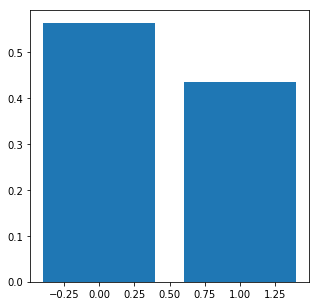

In [147]:
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(range(2), clf.feature_importances_)

In [181]:
print(clf.score(X_test, y_test) )

0.5601374570446735


# Then a grid search on a random forest classifier.

In [160]:
param_grid = {"max_depth": [1,2,3,None],
              "max_features": [1,2],
              "min_samples_split": [2,3,5,7,9],
              "bootstrap": [True],
              "criterion": ["gini", "entropy"]}

In [ ]:
param_grid

In [157]:
clf1 = RandomForestClassifier(n_estimators=20)

In [161]:
grid_search = GridSearchCV(clf1, param_grid=param_grid, cv=5, iid=False)

In [162]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, None], 'max_features': [1, 2], 'min_samples_split': [2, 3, 5, 7, 9], 'bootstrap': [True], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [163]:
clf2 = RandomForestClassifier(max_depth=None, max_features='auto', min_samples_split=2, bootstrap=True, criterion='gini', n_estimators=20)

In [164]:
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])